In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt


# 데이터셋 합치기

In [327]:
# 데이터불러오기 ( 2007 - 2017)
d=[]
for year in range(7,18):
    if year//10==0:
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(0)+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
    else :
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
len(d)

11

In [328]:
# inner 조인으로 모두 합치기
raw = pd.merge(d[10],d[9],how='outer')
for i in range(8,-1,-1):
    raw = pd.merge(raw, d[i], how='outer')

In [17]:
raw.shape

(89630, 1884)

<H3> BP8 긴급수혈(2016,2017 데이터셋에서)
   

In [364]:
d17=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN17_ALL.sas7bdat', encoding='latin-1')
d16=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN16_ALL.sas7bdat', encoding='latin-1')

In [375]:
id17 =raw[raw['year']==2017]['ID'].values
id16 =raw[raw['year']==2016]['ID'].values

In [327]:
# slp8_idx = d17[(d17.index.isin(idx2017)) & (d17['Total_slp_wk']==8888)].index
# d17.loc[d17.index.isin(slp8_idx),['Total_slp_wk']]=88
# slp9_idx = d17[(d17.index.isin(idx2017)) & (d17['Total_slp_wk']==9999)].index
# d17.loc[d17.index.isin(slp9_idx),['Total_slp_wk']]=99

In [378]:
BP8_17=(d17.loc[d17['ID'].isin(id17),['Total_slp_wk']]/60).values
BP8_16=(d16.loc[d16['ID'].isin(id16),['Total_slp_wk']]/60).values
print(BP8_17.shape)
print(BP8_16.shape)

(8127, 1)
(8150, 1)


In [380]:
print(raw[raw['year']==2017]['BP8'].isnull().sum())
print(raw[raw['year']==2016]['BP8'].isnull().sum())

8127
8150


In [381]:
#그대로 스무스하게 넣기
raw.loc[raw['year']==2017,['BP8']]=BP8_17
raw.loc[raw['year']==2016,['BP8']]=BP8_16

In [382]:
def garbage_killer(d):
#     # 여성관련 변수 제거
#     r = re.compile('^HW_.*')
#     w_var =list(filter(r.match, d.columns))
#     d_ = d.iloc[:, ~d.columns.isin(w_var)]
    
    # 가중치 변수 제거
    r2 = re.compile('^wt_.*')
    weight_var = list(filter(r2.match, d.columns))
    d_ = d.iloc[:, ~d.columns.isin(weight_var)]
    
    #쓰레기변수 삭제
    g_var = [x for x in d_.columns if str(d_[x].dtypes) not in ['float64', 'int64']]
    d__ = d_.iloc[:, ~d_.columns.isin(g_var)]
    
    # DE1_dg 보다 결측치 많은 변수 제거 ㅎ , default 2000
#     dc1_null = d__['DE1_dg'].isnull().sum()
#     if dc1_null > 2000:
        
#         d_ = d__.iloc[:, d__.isnull().sum().values <dc1_null+1]
#     else :
#         d_ = d__.iloc[:, d__.isnull().sum().values < 2000 ]

    # 나머지 결측치를 모두 버린다
#     d__.dropna(inplace=True)
    print('origin shape : {}'.format(d.shape))
    print('after shape : {}'.format(d__.shape))
    return d__

In [383]:
raw_ = garbage_killer(raw)

origin shape : (89630, 1884)
after shape : (89630, 1745)


# 결측치 처리

   <h2>모험의 시작 헉헉

![img](http://cfile21.uf.tistory.com/image/172157415071229F25BBC9)

In [385]:
#25000개 결측치 이상 변수 제거
raw__ = raw_.iloc[:,raw_.isnull().sum().values<25000]
print(max(raw__.isnull().sum()))
raw__.head()

24932


,year,region,town_t,apt_t,sex,age,incm,ho_incm,edu,occp,...,O_DTP,O_DIP,O_DFTD,O_DMFTP,O_DFID,O_DMFIP,OR1,BM12,BM12_1,LF_CARE
0,2017.0,1.0,1.0,1.0,1.0,76.0,3.0,1.0,3.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,1.0,1.0,1.0,2.0,69.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.0,1.0,1.0,1.0,1.0,39.0,1.0,2.0,3.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,1.0,1.0,1.0,2.0,35.0,1.0,2.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [386]:
raw__.iloc[:,raw__.isnull().sum().values>20000].isnull().sum()

occp         24168
fam_rela     24932
dr_month     23145
mh_stress    23120
BS2_1        23772
BS5          23399
HE_PLS       20196
HE_obe       24865
HE_glu       20046
HE_HB        20282
HE_HCT       20282
HE_anem      20285
HE_WBC       20282
HE_RBC       20282
HE_Bplt      24487
HE_Uph       21512
HE_Unitr     21512
HE_Usg       21512
HE_Upro      21512
HE_Uglu      21512
HE_Uket      21513
HE_Ubil      21512
HE_Ubld      21512
HE_Uro       21512
BE5_2        23891
O_DTD        23219
O_DTP        23220
O_DIP        23220
O_DFTD       23219
O_DMFTP      23220
O_DFID       23219
O_DMFIP      23220
OR1          23772
BM12         21482
BM12_1       22164
LF_CARE      23949
dtype: int64

In [387]:
dr_idx=raw__[raw__['dr_month'].isnull()].loc[(raw__['BD1'].isnull()) | (raw__['BD1_11'].isnull())]['year'].index

In [388]:
raw__=raw__[~raw__.index.isin(dr_idx)]
dr_idx2=raw__[raw__['dr_month'].isnull()].loc[(raw__['BD1']==8) |(raw__['BD1_11']==8)].index
raw__.loc[raw__.index.isin(dr_idx2),['dr_month']]=0
raw__=raw__.loc[~raw__.index.isin(raw__[raw__['dr_month'].isnull()][raw__['BD1']==9].index)]
raw__.loc[raw__.index.isin(raw__[raw__['dr_month'].isnull()].loc[(raw__['BD1']==2) & (raw__['BD1_11'].isin([3,4,5,6]))][['dr_month','BD1','BD1_11']].index),['dr_month']]=1
raw__.loc[raw__.index.isin(raw__[raw__['dr_month'].isnull()].loc[(raw__['BD1']==2) & (raw__['BD1_11'].isin([1,2]))][['dr_month','BD1','BD1_11']].index),['dr_month']]=0
raw__=raw__.loc[~raw__.index.isin(raw__[raw__['dr_month'].isnull()].index)]
raw__.shape

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(80187, 373)

In [389]:
# 필요없는 변수 거르기
raw__=raw__.loc[:,~raw__.columns.isin(['fam_rela','LF_CARE'])]
raw__=raw__.loc[:,~raw__.columns.isin(['BA1_1','BA1_2','BA1_3'])]

In [390]:
ch2_idx = raw__.loc[(raw__['CH2_1'].isnull()) & (raw__['CH2_2'].isnull()) & (raw__['age'] >7)].index
raw__.loc[raw__.index.isin(ch2_idx),['CH2_1','CH2_2']]=8

In [391]:
raw__.loc[raw__.index.isin(raw__.loc[(raw__['CH2_1'].isnull()) & (raw__['CH2_2'].isnull())][raw__['educ']>4].index),['CH2_1','CH2_2']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [392]:
raw___=raw__

In [393]:
bs_idx = raw___[(raw___['BS1_1']==3) & (raw___['BS2_1'].isnull())][['BS1_1','BS2_1']].index
raw___.loc[raw___.index.isin(bs_idx),['BS2_1']]=888

In [394]:
raw___.loc[raw___.index.isin(raw___[(raw___['sex']==1) & (raw___['HE_mens'].isnull())].index),['HE_mens']]=8

In [395]:
raw___.loc[raw___.index.isin(raw___[(raw___['sex']==1) & (raw___['HE_prg'].isnull())].index),['HE_prg']]=8

In [396]:
pls_idx = raw___[(raw___['HE_PLS'].isnull()) & (raw___['HE_sbp2'].isnull())]['HE_PLS'].isnull().index
raw____=raw___.loc[~raw___.index.isin(pls_idx),:]

In [404]:
raw____.loc[:,raw____.isnull().sum()>10000].isnull().sum()

Series([], dtype: float64)

# 치아변수 싹다 버리기

In [398]:
# 필요없는 변수 거르기
raw____=raw____.loc[:,~raw____.columns.isin(['O_DTD','O_DTP','O_DIP','O_DFTD','O_DMFTP','O_DFID','O_DMFIP'])]
raw____=raw____.loc[:,~raw____.columns.isin(['BM12_1','BM12'])]
raw____=raw____.loc[:,~raw____.columns.isin(['LF_SAFE'])]

In [399]:
raw____.loc[raw____.index.isin(raw____[raw____['BE5_2'].isnull()].index),['BE5_2']]=1

In [400]:
raw____[raw____['BP8'].isnull()]['BE5_2']

Series([], Name: BE5_2, dtype: float64)

In [401]:
raw____.loc[raw____.index.isin(raw____[raw____['OR1'].isnull()].index),['OR1']]=3

In [402]:
raw____.loc[raw____.index.isin(raw____[(raw____['BS3_1']==8) & (raw____['BS5'].isnull())].index),['BS5']]=8

In [403]:
raw____[raw____['BS5_30']==1]['BS5_30'].value_counts()

1.0    2462
Name: BS5_30, dtype: int64

# 세이브 포인트

In [405]:
raw____.to_csv('raw.csv', index=False)

In [406]:
raw = pd.read_csv('raw.csv')

# 10000개 이상 결측치 처리완료 5000개 이상 시작 ㅎ

In [407]:
raw.loc[:,raw.isnull().sum()>5000].isnull().sum()

occp          6739
DI9_yd        9772
DI9_ya        9772
DF1_yd        9772
DF1_ya        9772
DN6_yd        9772
DN6_ya        9772
DJ9_yd        9772
DJ9_ya        9772
BH9_11        6193
mh_stress     5511
BS2_1         6787
BS6_2         6840
BS5           5327
BS5_21        7394
BS5_28        7394
BS5_26        7394
BS5_29        7394
BS5_30        7394
BS10_1        9772
BS2           9775
BS10_2        9775
BS10_3        9775
HE_obe        9261
HE_Bplt       8526
HE_Uph        5690
HE_Unitr      5690
HE_Usg        5690
HE_Upro       5690
HE_Uglu       5690
              ... 
LK_LB_IT      8616
LK_LB_EF      8616
N_DIET        8586
N_DIET_WHY    8586
N_WAT_C       8586
N_INTK        8586
N_EN          8586
N_WATER       8586
N_PROT        8586
N_FAT         8586
N_CHO         8586
N_CA          8586
N_PHOS        8586
N_FE          8586
N_NA          8586
N_K           8586
N_VA          8586
N_CAROT       8586
N_RETIN       8586
N_B1          8586
N_B2          8586
N_NIAC      

In [408]:
#DI9_yd..  : 소아 청소년 질환 -> 어른들이 대답안했을 가능성 존재
di_idx = raw[(raw['DI9_yd'].isnull()) & (raw['age'] >18)].index
raw.loc[raw.index.isin(di_idx),['DI9_yd']]=8

In [409]:
di_idx = raw[(raw['DF1_yd'].isnull()) & (raw['age'] >18)].index
raw.loc[raw.index.isin(di_idx),['DF1_yd']]=8

In [410]:
bs_idx = raw[(raw['BS10_1'].isnull()) & (raw['age'] >18)].index
raw.loc[raw.index.isin(bs_idx), ['BS10_1','BS2','BS10_2','BS10_3']]=8

In [72]:
for col in raw.columns:
    if len(raw[raw['N_INTK'].isnull()][col].value_counts().keys()) <3:
        print(col)  

town_t
apt_t
sex
dr_month
mh_stress
HE_HPdg
HE_DMdg
HE_rPLS
HE_nARM
HE_hepaB
HE_anem
HE_Unitr
LK_EDU
N_DIET
N_DIET_WHY
N_WAT_C
N_INTK
N_EN
N_WATER
N_PROT
N_FAT
N_CHO
N_CA
N_PHOS
N_FE
N_NA
N_K
N_VA
N_CAROT
N_RETIN
N_B1
N_B2
N_NIAC
N_VITC


In [86]:
raw[raw['BS10_1'].isnull()]['age'].values.min()

19.0

In [412]:
nsmk_idx = raw[(raw['BS5_30'].isnull()) & (raw['BS3_1']==8)].index
raw.loc[raw.index.isin(nsmk_idx), ['BS5_30']]=8

In [413]:
osmk_idx = raw[(raw['BS5_30'].isnull()) & (raw['BS3_1']==3)].index
raw.loc[raw.index.isin(nsmk_idx), ['BS5_30']]=1

In [414]:
n_idx = raw[(raw['BS5_29'].isnull()) & (raw['BS3_1']==8)].index
raw.loc[raw.index.isin(n_idx), ['BS5_29','BS5_26','BS5_28','BS5_21']]=8

In [415]:
raw_ = raw.loc[~raw.index.isin(raw[raw['N_DIET_WHY'].isnull()].index),:]

In [416]:
print(raw_.shape)
raw_.loc[:,raw_.isnull().sum() > 100].isnull().sum()

(63203, 358)


incm        668
ho_incm     668
edu        1039
occp       6036
ainc        667
DI1_dg     1008
DI1_ag     1008
DI1_pr     1008
DI1_pt     1008
DI1_2      1008
DI2_dg     1008
DI2_ag     1008
DI2_pr     1008
DI2_pt     1008
DI2_2      1008
DI3_dg     1008
DI3_ag     1008
DI3_pr     1008
DI3_pt     1008
DI3_2      1008
DI4_dg     2793
DI4_pr     2793
DI4_pt     2793
DI5_dg     1008
DI5_ag     1008
DI5_pr     1008
DI5_pt     1008
DI6_dg     1008
DI6_ag     1008
DI6_pr     1008
           ... 
HE_Usg     4867
HE_Upro    4867
HE_Uglu    4867
HE_Uket    4868
HE_Ubil    4867
HE_Ubld    4867
HE_Uro     4867
BM1_1       161
BM1_2       161
BM1_3       161
BM1_4       161
BM1_5       161
BM1_6       161
BM1_7       161
BM1_8       161
BM2_1      1358
BM2_3      1358
BM2_2      1358
BM2_4      1358
BM2_5      1358
BM7        1905
BM8        1912
OR1_2       192
BH1_1      6940
BH1_2      6940
BH1_3      6940
BH1_6      6940
BH2_62     6940
BH2_63     6940
BH2_64     6940
Length: 226, dtype: int6

In [417]:
# 필요없는 변수 거르기
raw__=raw_.loc[:,~raw_.columns.isin(['BH1_1','BH1_2','BH1_3','BH1_6','BH2_62','BH2_63','BH2_64'])]

In [171]:
raw__.loc[:,raw__.isnull().sum() > 100].isnull().sum()

incm         668
ho_incm      668
edu         1039
occp        6036
ainc         667
DI1_dg      1008
DI1_ag      1008
DI1_pr      1008
DI1_pt      1008
DI1_2       1008
DI2_dg      1008
DI2_ag      1008
DI2_pr      1008
DI2_pt      1008
DI2_2       1008
DI3_dg      1008
DI3_ag      1008
DI3_pr      1008
DI3_pt      1008
DI3_2       1008
DI4_dg      2793
DI4_pr      2793
DI4_pt      2793
DI5_dg      1008
DI5_ag      1008
DI5_pr      1008
DI5_pt      1008
DI6_dg      1008
DI6_ag      1008
DI6_pr      1008
            ... 
HE_TG       3687
HE_HBsAg    3686
HE_ast      3640
HE_alt      3639
HE_hepaB    3642
HE_HB       3939
HE_HCT      3939
HE_anem     3940
HE_BUN      3639
HE_crea     3643
HE_WBC      3939
HE_RBC      3939
HE_Bplt     7394
BM1_1        161
BM1_2        161
BM1_3        161
BM1_4        161
BM1_5        161
BM1_6        161
BM1_7        161
BM1_8        161
BM2_1       1358
BM2_3       1358
BM2_2       1358
BM2_4       1358
BM2_5       1358
BM7         1905
BM8         19

In [418]:
obe_idx = raw__[(raw__['HE_obe'].isnull()) & (raw__['age'] <20)].index
raw__.loc[raw__.index.isin(obe_idx), ['HE_obe']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [419]:
# 필요없는 변수 거르기
raw__=raw__.loc[:,~raw__.columns.isin(['HE_Uph','HE_Unitr','HE_Usg','HE_Upro','HE_Uglu','HE_Uket','HE_Ubil','HE_Ubld','HE_Uro' ])]

In [420]:
raw___ = raw__.loc[~raw__.index.isin(raw__[raw__['HE_Bplt'].isnull()].index), :]

In [421]:
raw___.shape

(55809, 342)

In [422]:
raw__.shape

(63203, 342)

# 결측치 체크포인트

In [443]:
raw___.loc[:,raw___.isnull().sum() > 1000].isnull().sum()

Series([], dtype: float64)

In [442]:
bm7_idx = raw___[(raw___['BM7'].isnull()) & (raw___['age'] <19)].index
raw___.loc[raw___.index.isin(bm7_idx), ['BM7']]=8
bm8_idx = raw___[(raw___['BM8'].isnull()) & (raw___['age'] <19)].index
raw___.loc[raw___.index.isin(bm8_idx), ['BM8']]=8

In [440]:
y_idx = raw___[(raw___['DI9_ya'].isnull()) & (raw___['age'] >18)].index
raw___.loc[raw___.index.isin(y_idx), ['DI9_ya','DF1_ya', 'DN6_ya', 'DJ9_ya' ]]=888
raw___.loc[raw___.index.isin(y_idx), ['DN6_yd','DJ9_yd']]=8

In [424]:
dm1_idx = raw___[(raw___['DM1_dg'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(dm1_idx),['DM1_dg','DM1_pr','DM1_pt']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [425]:
bi4_idx = raw___[(raw___['DI4_dg'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(bi4_idx),['DI4_dg','DI4_pr','DI4_pt']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [426]:
bs26_idx = raw___[(raw___['BS5_26'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(bs26_idx),['BS5_21','BS5_28','BS5_26']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [427]:
bs29_idx = raw___[(raw___['BS5_29'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(bs29_idx),['BS5_29']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [428]:
bs5_idx = raw___[(raw___['BS5_30'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(bs5_idx),['BS5_30']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [429]:
mh_idx = raw___[(raw___['mh_stress'].isnull()) & (raw___['BP1'].isin([3,4]))].index
raw___.loc[raw___.index.isin(mh_idx),['mh_stress']]=0
mh_idx = raw___[(raw___['mh_stress'].isnull()) & (raw___['BP1'].isin([1,2]))].index
raw___.loc[raw___.index.isin(mh_idx),['mh_stress']]=1
mh_idx = raw___[(raw___['mh_stress'].isnull()) & (raw___['BP1'].isin([8]))].index
raw___.loc[raw___.index.isin(mh_idx),['mh_stress']]=8

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [430]:
y_idx = raw___[(raw___['BS6_2_1'].isnull()) & (raw___['BS6_2'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(y_idx),['BS6_2_1']]=88
raw___.loc[raw___.index.isin(y_idx),['BS6_2']]=8888

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [431]:
y_idx88 = raw___[(raw___['BS6_2'].isnull()) & (raw___['BS6_2_1']==88)].index
raw___.loc[raw___.index.isin(y_idx88),['BS6_2']]=8888
y_idx88 = raw___[(raw___['BS6_2'].isnull()) & (raw___['BS6_2_1']==99)].index
raw___.loc[raw___.index.isin(y_idx88),['BS6_2']]=9999

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [432]:
y_idx = raw___[(raw___['BS2_1'].isnull()) & (raw___['age'] <20)].index
raw___.loc[raw___.index.isin(y_idx),['BS2_1']]=88

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [433]:
# 필요없는 변수 거르기
raw___=raw___.loc[:,~raw__.columns.isin(['occp' ])]
raw___=raw___.loc[:,~raw___.columns.isin(['BH9_11'])]

In [434]:
bs5_idx = raw___[(raw___['BS5'].isnull()) & (raw___['BS3_1']==3)].index
raw___.loc[raw___.index.isin(bs5_idx), ['BS5']]=1
bs5_idx = raw___[(raw___['BS5'].isnull()) & (raw___['age']<20)].index
raw___.loc[raw___.index.isin(bs5_idx), ['BS5']]=8

In [435]:
pls_idx = raw___[raw___['HE_PLS'].isnull()].index
raw___ = raw___.loc[~raw___.index.isin(pls_idx), :]

In [436]:
bs2_idx = raw___[raw___['BS2_1'].isnull()].index
raw___ = raw___.loc[~raw___.index.isin(bs2_idx), :]

# 결측치 세이브 포인트

In [444]:
raw___.to_csv('raw___.csv')

In [452]:
raw = pd.read_csv('raw___.csv')

In [461]:
raw.loc[:,raw.isnull().sum() > 600].isnull().sum()

edu       738
DI4_dg    636
DI4_pr    636
DI4_pt    636
DM1_dg    638
DM1_pr    638
DM1_pt    638
BS5       679
dtype: int64

In [463]:
raw.shape

(49085, 336)

In [454]:
di1_idx = raw[(raw['DI1_dg'].isnull()) & (raw['age'] <20)].index
raw.loc[raw.index.isin(di1_idx), ['DI1_dg','DI1_ag','DI1_pr','DI1_pt','DI1_2']]=8

In [455]:
di2_idx = raw[(raw['DI2_dg'].isnull()) & (raw['age'] <20)].index
raw.loc[raw.index.isin(di2_idx), ['DI2_dg','DI2_ag','DI2_pr','DI2_pt','DI2_2']]=8

In [457]:
#필요없는 변수 거르기
raw=raw.loc[:,~raw.columns.isin(['BM2_1','BM2_2','BM2_3','BM2_4','BM2_5'])]

In [482]:
bp8_index = raw[(raw['BP8']>148) & (raw['BP8']<165)].index
raw.loc[raw.index.isin(bp8_index), ['BP8']]=88
bp8_index = raw[(raw['BP8']>166)].index
raw.loc[raw.index.isin(bp8_index), ['BP8']]=99

In [469]:
#귀찮아서 버린다

# 마지막 청소버튼 꾸욱

In [484]:
raw_ = raw.dropna()

In [485]:
raw_.shape

(46201, 336)

In [486]:
#깔끔
raw_.isnull().sum().sum()

0

In [487]:
#저장
raw_.to_csv('data_25k.csv', index=False)

In [488]:
#불러오기
data = pd.read_csv('data_25k.csv', index_col=0)

In [475]:
data.head()

,year,region,town_t,apt_t,sex,age,incm,ho_incm,edu,kstrata,...,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,BP8,BE5_2,OR1
0,2017.0,1.0,1.0,1.0,1.0,76.0,3.0,1.0,3.0,713.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,8.0,1.0,3.0
1,2017.0,1.0,1.0,1.0,1.0,39.0,1.0,2.0,3.0,713.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,7.5,1.0,3.0
2,2017.0,1.0,1.0,1.0,2.0,35.0,1.0,2.0,4.0,713.0,...,163.987809,1572.307650,32.962171,1.042056,0.940837,15.316899,53.504714,7.0,1.0,3.0
3,2017.0,1.0,1.0,1.0,1.0,71.0,2.0,2.0,1.0,713.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,6.0,1.0,3.0
6,2017.0,1.0,1.0,1.0,2.0,28.0,1.0,2.0,4.0,713.0,...,498.973864,3106.120365,239.230500,1.362008,0.769168,11.564073,49.065508,8.5,1.0,3.0


In [489]:
data = data.iloc[:,1:] # year 삭제
print(data.shape)
data.head()

(46201, 334)


,region,town_t,apt_t,sex,age,incm,ho_incm,edu,kstrata,cfam,...,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,BP8,BE5_2,OR1
0,1.0,1.0,1.0,1.0,76.0,3.0,1.0,3.0,713.0,2.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,8.0,1.0,3.0
1,1.0,1.0,1.0,1.0,39.0,1.0,2.0,3.0,713.0,3.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,7.5,1.0,3.0
2,1.0,1.0,1.0,2.0,35.0,1.0,2.0,4.0,713.0,3.0,...,163.987809,1572.307650,32.962171,1.042056,0.940837,15.316899,53.504714,7.0,1.0,3.0
3,1.0,1.0,1.0,1.0,71.0,2.0,2.0,1.0,713.0,2.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,6.0,1.0,3.0
6,1.0,1.0,1.0,2.0,28.0,1.0,2.0,4.0,713.0,1.0,...,498.973864,3106.120365,239.230500,1.362008,0.769168,11.564073,49.065508,8.5,1.0,3.0


# 다중공선성 확인

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
#VIF CHECK
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

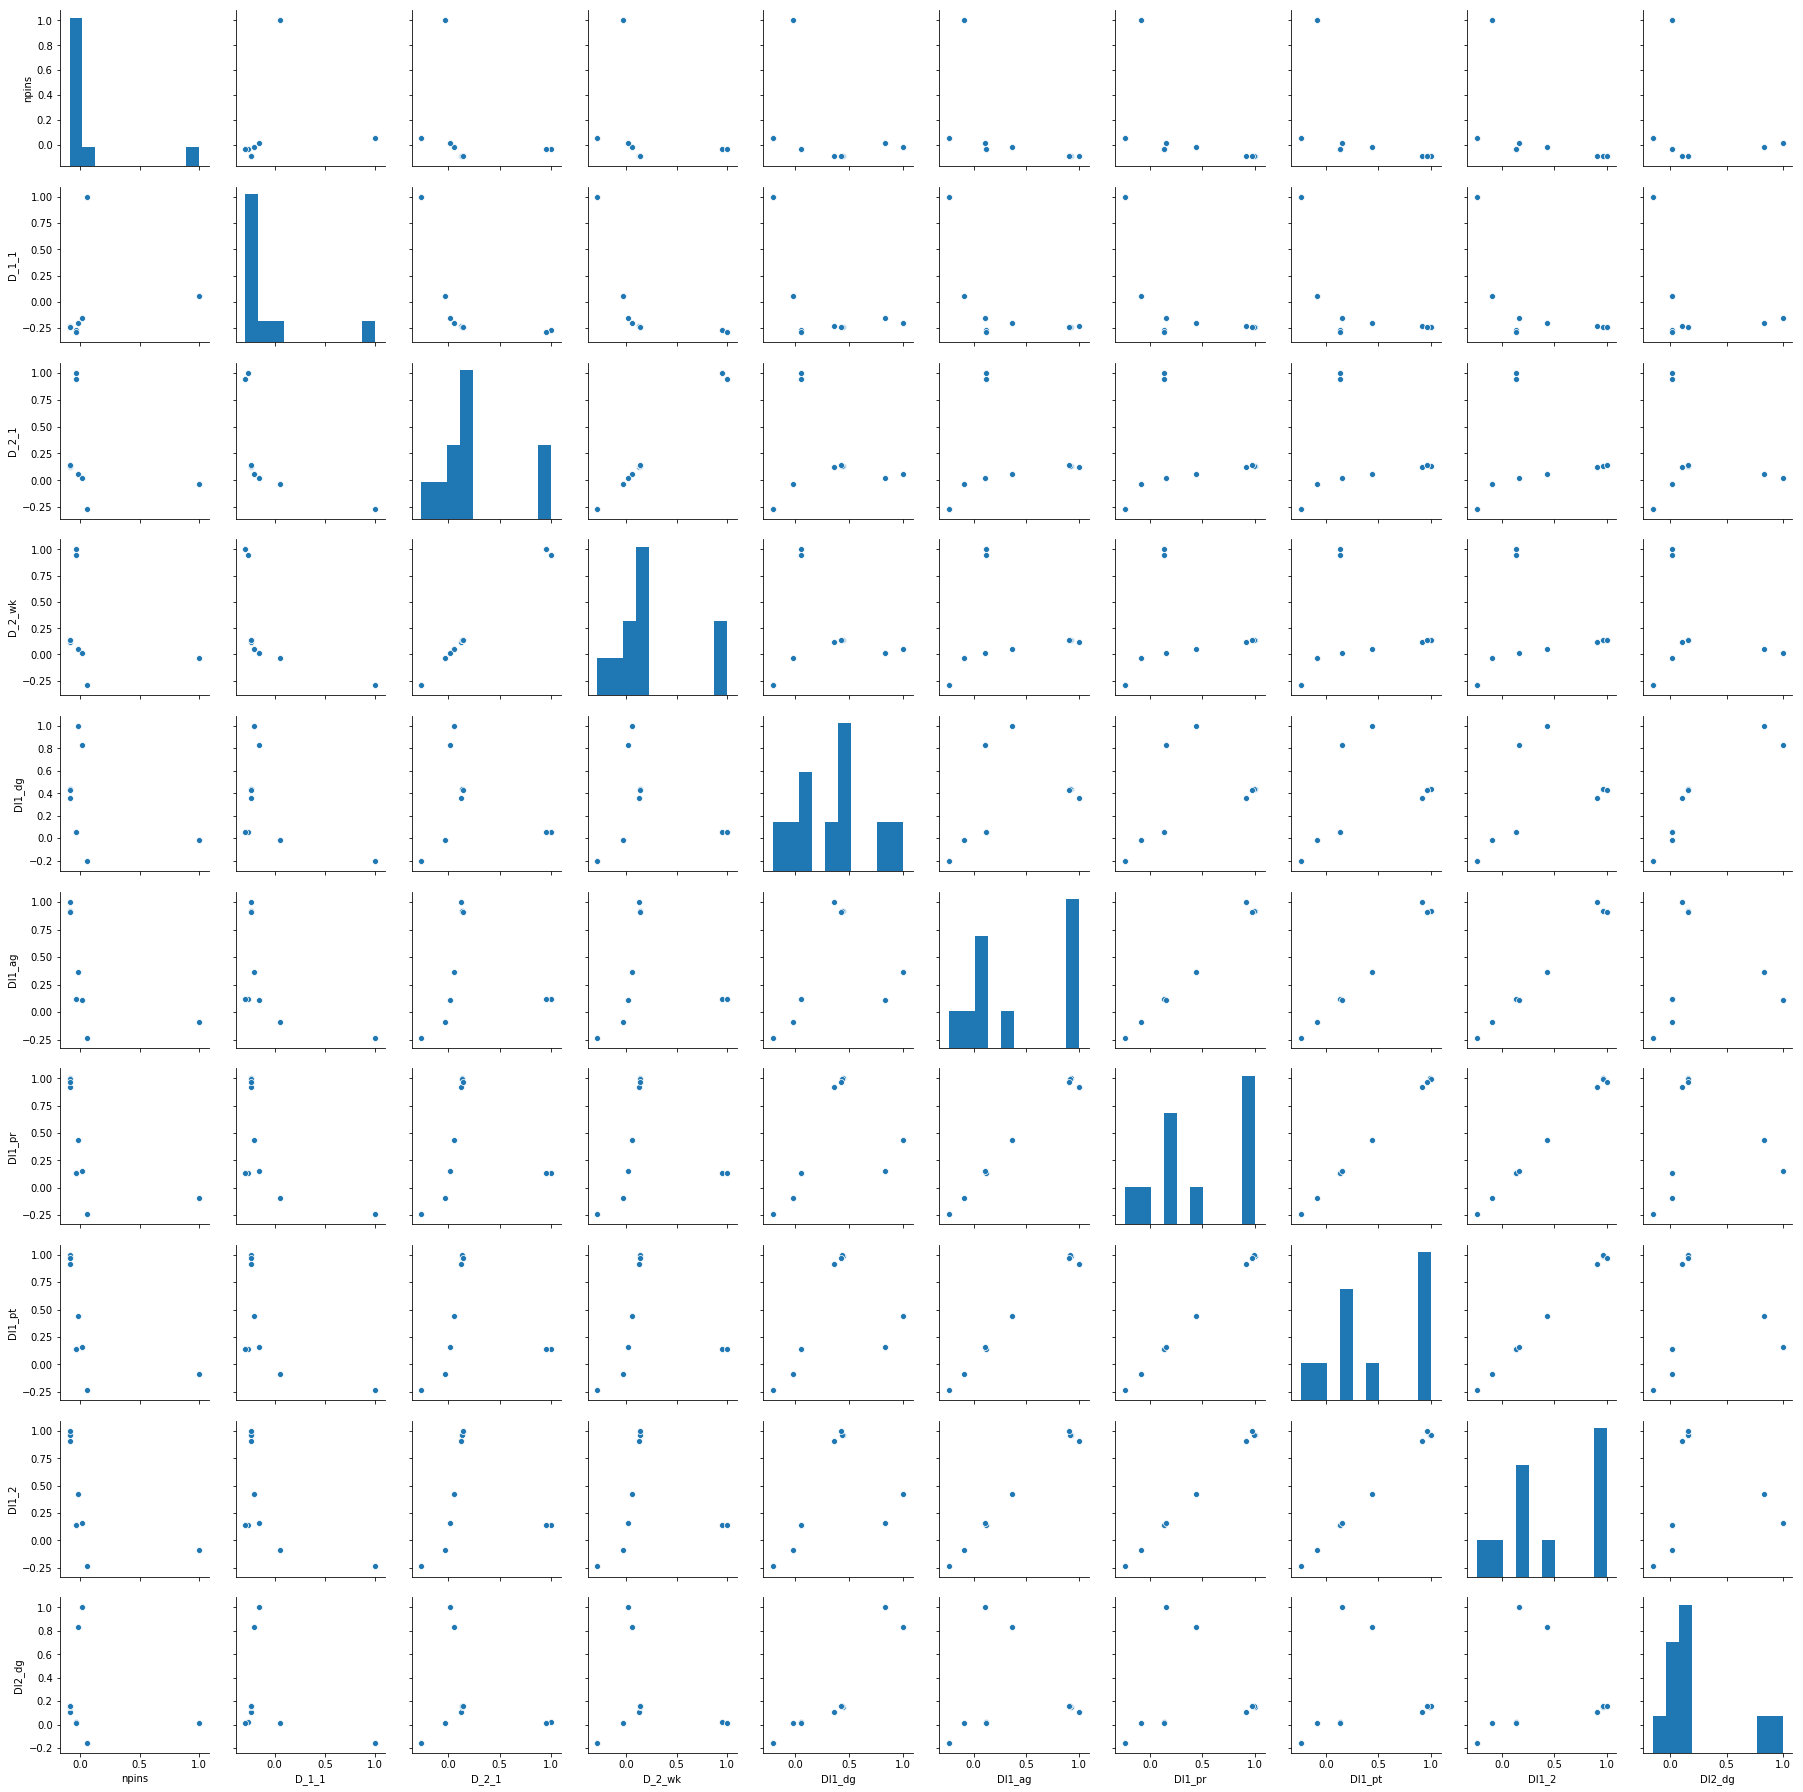

In [9]:
#상관계수 체크
plt.figure(figsize=(20,20))
sns.pairplot(data.iloc[:,20:30].corr())

# 타겟변수 정의

In [61]:
data['DE1_dg'].value_counts()

8.0    8097
1.0     783
0.0      20
Name: DE1_dg, dtype: int64

In [62]:
#8은 비해당이므로 없음(0) 으로 대체 ->8로 할경우 정확도가 높아짐
data.loc[data['DE1_dg']==8.0,['DE1_dg']]=0
data['DE1_dg'].value_counts()

0.0    8117
1.0     783
Name: DE1_dg, dtype: int64

In [21]:
#9 살펴보기
pd.set_option('display.max_columns',300)
data[data['DE1_dg']==9]

,region,town_t,apt_t,sex,age,incm,ho_incm,edu,kstrata,cfam,genertn,allownc,house,live_t,ainc_unit1,ainc_1,ainc,marri_1,marri_2,tins,npins,D_1_1,D_2_1,D_2_wk,DI1_dg,DI1_ag,DI1_pr,DI1_pt,DI1_2,DI2_dg,DI2_ag,DI2_pr,DI2_pt,DI2_2,DI3_dg,DI3_ag,DI3_pr,DI3_pt,DI3_2,DI5_dg,DI5_ag,DI5_pr,DI5_pt,DI6_dg,DI6_ag,DI6_pr,DI6_pt,DM2_dg,DM2_ag,DM2_pr,DM2_pt,DM3_dg,DM3_ag,DM3_pr,DM3_pt,DJ2_dg,DJ2_ag,DJ2_pr,DJ2_pt,DJ4_dg,DJ4_ag,DJ4_pr,DJ4_pt,DJ4_3,DE1_dg,DE1_ag,DE1_pr,DE1_pt,DE1_3,DE1_31,DE1_32,DE1_33,DE1_34,DE2_dg,DE2_ag,DE2_pr,DE2_pt,DC1_dg,DC1_ag,DC1_pr,DC1_pt,DC2_dg,DC2_ag,DC2_pr,DC2_pt,DC3_dg,DC3_ag,DC3_pr,DC3_pt,DC4_dg,DC4_ag,DC4_pr,DC4_pt,DC5_dg,DC5_ag,DC5_pr,DC5_pt,DC6_dg,DC6_ag,DC6_pr,DC6_pt,DC11_dg,DC11_ag,DC11_pr,DC11_pt,DF2_dg,DF2_ag,DF2_pr,DF2_pt,DL1_dg,DL1_ag,DL1_pr,DL1_pt,DN1_dg,DN1_ag,DN1_pr,DN1_pt,DK8_dg,DK8_ag,DK8_pr,DK8_pt,DK9_dg,DK9_ag,DK9_pr,DK9_pt,DK4_dg,DK4_ag,DK4_pr,DK4_pt,BH1,BH2_61,LQ4_00,LQ4_01,LQ4_02,LQ4_03,LQ4_04,LQ4_05,LQ4_06,LQ4_07,LQ4_08,LQ4_09,LQ4_10,LQ4_11,LQ4_12,LQ4_13,LQ4_14,LQ4_15,LQ4_16,LQ4_21,LQ4_22,LQ4_23,LQ4_17,LQ4_18,LQ4_19,LQ4_20,LQ1_sb,LQ1_mn,LQ2_ab,LQ2_mn,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,educ,graduat,EC1_1,EC1_2,EC_occp,EC_stt_1,EC_stt_2,EC_wh,EC_wht_5,EC_lgw_2,EC_lgw_4,EC_lgw_5,EC_pedu_1,EC_pedu_2,BO1,BO1_1,BO1_2,BO1_3,BO2_1,BO3_01,BO3_02,BO3_03,BO3_05,BO3_04,BO3_12,BO3_07,BO3_09,BO3_10,BD1,BD2,BD1_11,BD2_1,BD2_31,BD2_32,BD7_4,BD7_5,BA2_12,BA2_13,BA2_2_1,BA2_2_2,BA2_2_3,BA2_2_4,BA2_2_5,BA2_2_6,BA2_22,BP1,BP5,BP6_10,BP6_31,BP7,BS1_1,BS3_1,BS3_2,BS6_2_1,BS6_2_2,BS6_3,BS5_1,BS8_2,BS9_2,BE3_31,BE3_32,BE3_33,BE5_1,HE_HPdg,HE_HPdr,HE_DMdg,HE_DMdr,HE_ht,HE_wt,HE_wc,HE_BMI,BM1_1,BM1_2,BM1_3,BM1_4,BM1_5,BM1_6,BM1_7,BM1_8,BM2_1,BM2_3,BM2_2,BM2_4,BM2_5,OR1_2,L_OUT_FQ,N_DIET,N_DIET_WHY,N_WAT_C,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
1821,3.0,1.0,2.0,2.0,6.0,2.0,3.0,1.0,703.0,4.0,4.0,20.0,2.0,2.0,1.0,5360.0,446.666667,2.0,88.0,20.0,1.0,9.0,9.0,99.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,9.0,999.0,8.0,8.0,9.0,9.0,999.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,9.0,999.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,99.0,8.0,8.0,8.0,8.0,8.0,88.0,8.0,8.0,8.0,88.0,8.0,8.0,8.0,88.0,88.0,8.0,8.0,88.0,88.0,3.0,8.0,8.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,888.0,8.0,888.0,8.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,888.0,88.0,88.0,888.0,8.0,8.0,3.0,88.0,88.0,88.0,8.0,0.0,0.0,0.0,0.0,123.4,21.7,52.3,14.250477,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,8.0,8.0,8.0,8.0,1.0,3.0,2.0,8.0,3.0,720.435872,1217.484593,448.313126,36.907606,34.044335,192.088219,313.805261,575.984490,5.115432,1774.072698,1126.689846,196.934705,489.208869,146.953677,0.740939,0.954761,4.603986,8.270181
1822,3.0,1.0,2.0,1.0,5.0,2.0,3.0,1.0,703.0,4.0,4.0,20.0,2.0,2.0,1.0,5360.0,446.666667,2.0,88.0,20.0,1.0,9.0,9.0,99.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,9.0,999.0,8.0,8.0,9.0,9.0,999.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,9.0,999.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,888.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,99.0,8.0,8.0,8.0,8.0,8.0,88.0,8.0,8.0,8.0,88.0,8.0,8.0,8.0,88.0,88.0,8.0,8.0,88.0,88.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0

In [22]:
# 분석가의 탐색에 의해 없음(0)으로 대체
data.loc[data['DE1_dg']==9.0,['DE1_dg']]=0
data['DE1_dg'].value_counts()

0.0    59036
1.0     4704
Name: DE1_dg, dtype: int64

# 당뇨관련변수(DE1_*)  제거

In [490]:
DE1_var = list(filter(re.compile('^DE1_.*').match, data.columns))
de1_var = ['HE_glu2', 'HE_fst', 'DE1_dg', 'DE1_31', 'DE1_32', 'HE_DM','HE_DMdg','HE_glu','HE_Uglu','N_DIET_WHY']
de1_var.extend(DE1_var)
d_var = list(set(de1_var))
d_var.remove('DE1_dg')
d_var

['DE1_ag',
 'DE1_pr',
 'DE1_33',
 'DE1_32',
 'HE_DM',
 'DE1_pt',
 'HE_Uglu',
 'N_DIET_WHY',
 'DE1_3',
 'DE1_34',
 'HE_fst',
 'DE1_31',
 'HE_DMdg',
 'HE_glu2',
 'HE_glu']

In [499]:
data_ = data.loc[:, ~data.columns.isin(d_var)]
data_.shape

(46201, 322)

In [492]:
data_.to_csv('data_25k.csv', index=False)

# 데이터 표준화

In [493]:
from sklearn.preprocessing import StandardScaler

In [500]:
data_x=data_.loc[:,data_.columns!='DE1_dg']
data_y=data_.loc[:,data_.columns=='DE1_dg']

In [495]:
scaler = StandardScaler()

In [496]:
data_ = scaler.fit_transform(data_x)
data__ = pd.DataFrame(data_, columns=data_x.columns)

In [497]:
data__.head()

,region,town_t,apt_t,sex,age,incm,ho_incm,edu,kstrata,cfam,...,N_VA,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,BP8,BE5_2,OR1
0,-1.31378,-0.50921,-0.988486,-1.266799,1.564500,0.425901,-1.556812,0.382067,1.507992,-0.967639,...,-0.591575,-0.512435,-0.209096,-0.387414,-0.475697,-0.766314,-0.635987,-0.070096,-0.725353,-0.356666
1,-1.31378,-0.50921,-0.988486,-1.266799,-0.345700,-1.372239,-0.627436,0.382067,1.507992,-0.191293,...,-0.450430,-0.183918,-0.250161,0.597519,0.352257,0.488962,-0.342445,-0.109223,-0.725353,-0.356666
2,-1.31378,-0.50921,-0.988486,0.789391,-0.552209,-1.372239,-0.627436,1.229777,1.507992,-0.191293,...,-0.538904,-0.376041,-0.246163,-0.505486,-0.403696,-0.033719,-0.446430,-0.148350,-0.725353,-0.356666
3,-1.31378,-0.50921,-0.988486,-1.266799,1.306365,-0.473169,-0.627436,-1.313353,1.507992,-0.967639,...,-0.346003,-0.367808,0.391982,-0.014731,0.452942,0.009020,-0.750879,-0.226604,-0.725353,-0.356666
4,-1.31378,-0.50921,-0.988486,0.789391,-0.913598,-1.372239,-0.627436,1.229777,1.507992,-1.743986,...,-0.223941,-0.118522,0.408454,-0.151107,-0.619288,-0.428760,-0.487953,-0.030969,-0.725353,-0.356666


In [501]:
#저장
data__.to_csv('data_25k_norm.csv', index=False)
data_y.to_csv('data_25k_y.csv', index=False)